# Embedding Assignment

## Step-by-Step Approach to Embedding Techniques:

#**1.Setup and Data Preparation:**
* Import necessary libraries: pandas, numpy, nltk, sklearn, gensim, matplotlib, seaborn.
* Load the dataset: Choose a dataset for embedding generation.
* Preprocess the text data: Perform cleaning, tokenization, stop-word removal, and other preprocessing steps.


In [ ]:
import nltk
nltk.download('punkt_tab')  # Download the 'punkt' tokenizer
nltk.download('stopwords')  # Download the stopwords corpus

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Define a simple list of text (user-defined)
texts = [
    "Text embedding is crucial for NLP tasks.",
    "Machine learning is transforming industries.",
    "Deep learning is a subset of machine learning.",
    "Natural language processing deals with understanding human language.",
    "Text data can be represented using various embedding techniques."
]

# Create a DataFrame to hold the text
df = pd.DataFrame({'text': texts})

# Clean the text by removing stopwords, punctuation, and making everything lowercase
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercasing
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    # Tokenize and remove stopwords
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply the clean_text function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the cleaned data
print(df[['text', 'cleaned_text']])


                                                text  \
0           Text embedding is crucial for NLP tasks.   
1       Machine learning is transforming industries.   
2     Deep learning is a subset of machine learning.   
3  Natural language processing deals with underst...   
4  Text data can be represented using various emb...   

                                        cleaned_text  
0                   text embedding crucial nlp tasks  
1           machine learning transforming industries  
2              deep learning subset machine learning  
3  natural language processing deals understandin...  
4  text data represented using various embedding ...  


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(df[['cleaned_text']])

                                        cleaned_text
0                   text embedding crucial nlp tasks
1           machine learning transforming industries
2              deep learning subset machine learning
3  natural language processing deals understandin...
4  text data represented using various embedding ...


# **2. Bag of Words (BoW):**
* Create a BoW representation: Use CountVectorizer from sklearn to convert text into a matrix of word counts.
* Analyze the BoW matrix: Examine the sparsity and interpret the word frequencies.


In [ ]:
# Initialize the CountVectorizer (BoW)
bow_vectorizer = CountVectorizer()

# Fit and transform the cleaned text data to BoW representation
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

# Convert to DataFrame for better readability
bow_df = pd.DataFrame(X_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())

# Show the BoW matrix
print(bow_df)

# Analyze the sparsity of the matrix
print("Shape of BoW matrix:", X_bow.shape)
sparsity = 100 * (1 - X_bow.nnz / float(X_bow.shape[0] * X_bow.shape[1]))
print(f"Sparsity of the BoW matrix: {sparsity:.2f}%")


   crucial  data  deals  deep  embedding  human  industries  language  \
0        1     0      0     0          1      0           0         0   
1        0     0      0     0          0      0           1         0   
2        0     0      0     1          0      0           0         0   
3        0     0      1     0          0      1           0         2   
4        0     1      0     0          1      0           0         0   

   learning  machine  ...  processing  represented  subset  tasks  techniques  \
0         0        0  ...           0            0       0      1           0   
1         1        1  ...           0            0       0      0           0   
2         2        1  ...           0            0       1      0           0   
3         0        0  ...           1            0       0      0           0   
4         0        0  ...           0            1       0      0           1   

   text  transforming  understanding  using  various  
0     1            

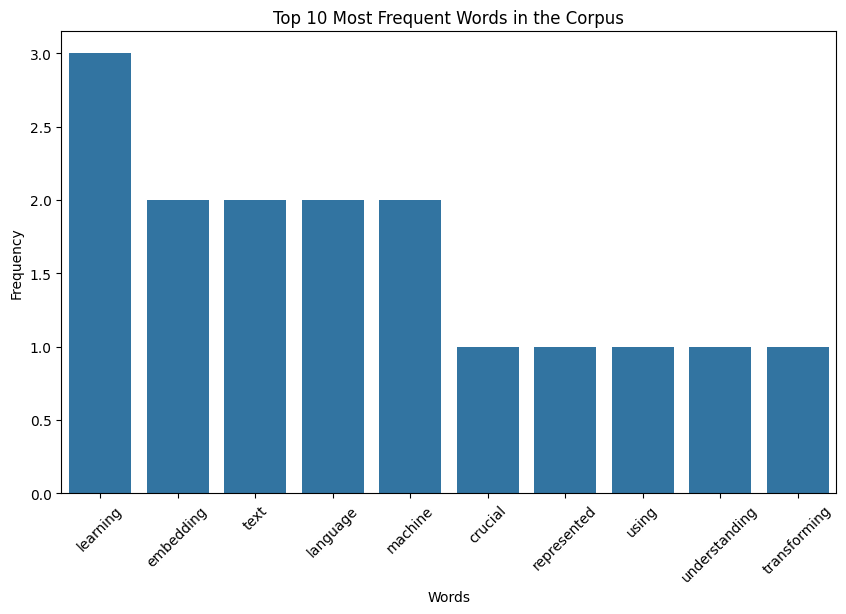

In [ ]:
# Get the sum of word counts across all documents
word_frequencies = bow_df.sum(axis=0)

# Sort the words by frequency
sorted_word_frequencies = word_frequencies.sort_values(ascending=False)

# Plot the top 10 most frequent words
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_word_frequencies.head(10).index, y=sorted_word_frequencies.head(10).values)
plt.title('Top 10 Most Frequent Words in the Corpus')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


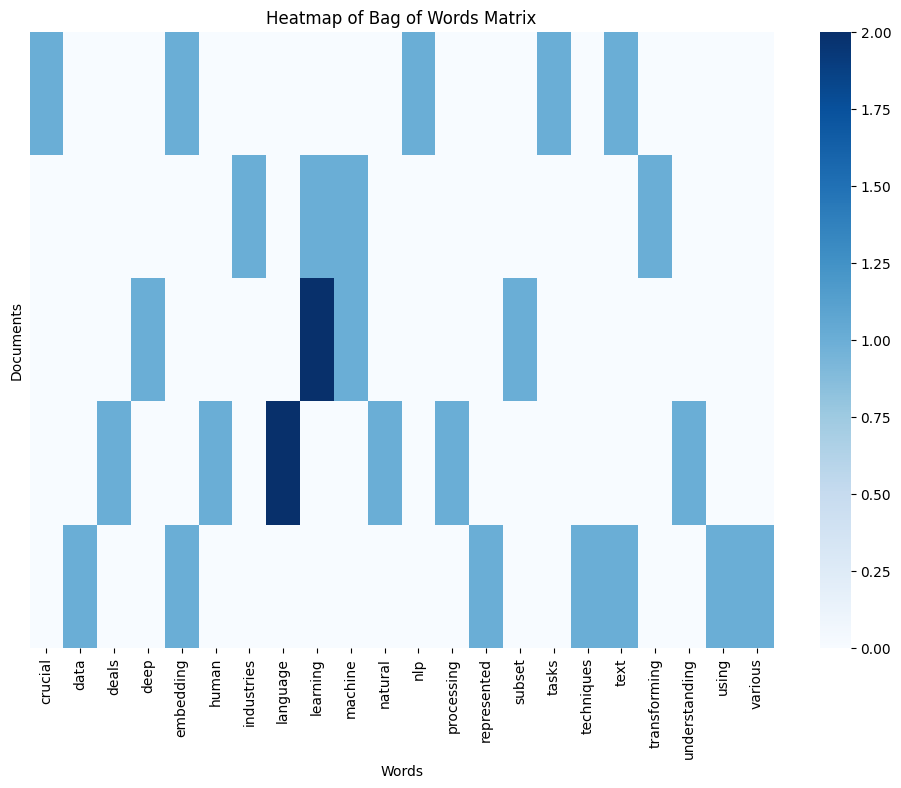

In [ ]:
# Plot a heatmap of the BoW matrix (rows = documents, columns = words)
plt.figure(figsize=(12, 8))
sns.heatmap(bow_df, cmap="Blues", annot=False, cbar=True, xticklabels=True, yticklabels=False)
plt.title('Heatmap of Bag of Words Matrix')
plt.xlabel('Words')
plt.ylabel('Documents')
plt.show()


# **3. TF-IDF:**
* Apply TF-IDF transformation: Use TfidfVectorizer to generate TF-IDF features from the text data.
* Interpret TF-IDF scores: Analyze how TF-IDF weighs different words in the dataset.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data to TF-IDF representation
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Convert to DataFrame for better readability
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Show the TF-IDF matrix
print(tfidf_df)

# Analyze the sparsity of the matrix
print("Shape of TF-IDF matrix:", X_tfidf.shape)
sparsity = 100 * (1 - X_tfidf.nnz / float(X_tfidf.shape[0] * X_tfidf.shape[1]))
print(f"Sparsity of the TF-IDF matrix: {sparsity:.2f}%")


   crucial      data     deals      deep  embedding     human  industries  \
0  0.48214  0.000000  0.000000  0.000000   0.388988  0.000000    0.000000   
1  0.00000  0.000000  0.000000  0.000000   0.000000  0.000000    0.550329   
2  0.00000  0.000000  0.000000  0.436246   0.000000  0.000000    0.000000   
3  0.00000  0.000000  0.333333  0.000000   0.000000  0.333333    0.000000   
4  0.00000  0.398352  0.000000  0.000000   0.321388  0.000000    0.000000   

   language  learning   machine  ...  processing  represented    subset  \
0  0.000000  0.000000  0.000000  ...    0.000000     0.000000  0.000000   
1  0.000000  0.444002  0.444002  ...    0.000000     0.000000  0.000000   
2  0.000000  0.703920  0.351960  ...    0.000000     0.000000  0.436246   
3  0.666667  0.000000  0.000000  ...    0.333333     0.000000  0.000000   
4  0.000000  0.000000  0.000000  ...    0.000000     0.398352  0.000000   

     tasks  techniques      text  transforming  understanding     using  \
0  0.48214 

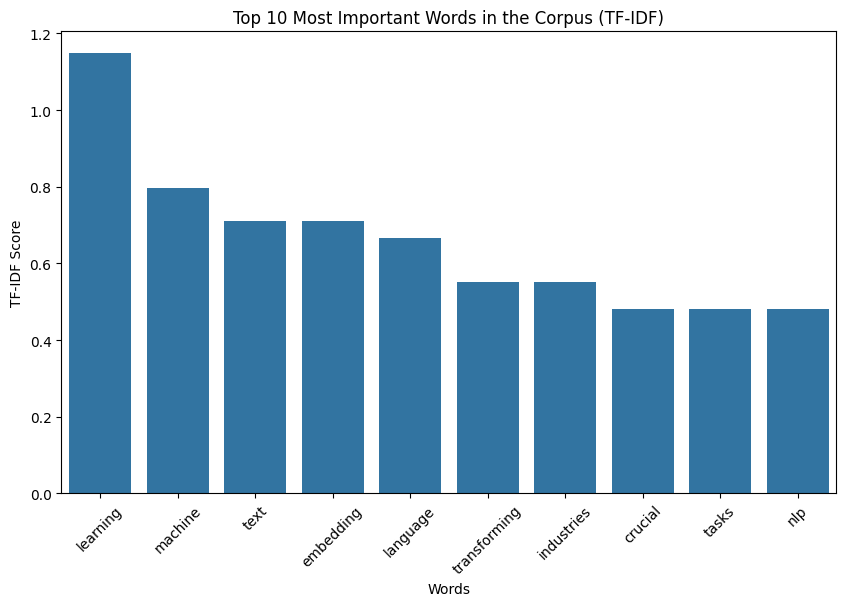

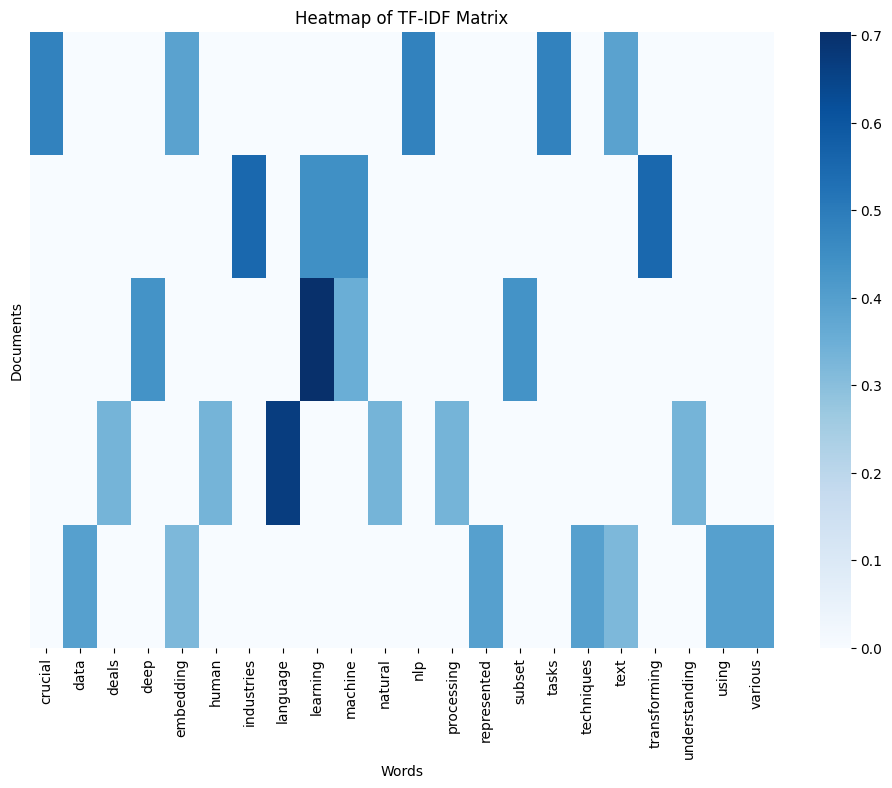

In [ ]:
# Get the sum of TF-IDF scores across all documents
word_importance = tfidf_df.sum(axis=0)

# Sort the words by importance
sorted_word_importance = word_importance.sort_values(ascending=False)

# Plot the top 10 most important words
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_word_importance.head(10).index, y=sorted_word_importance.head(10).values)
plt.title('Top 10 Most Important Words in the Corpus (TF-IDF)')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()

# Plot a heatmap of the TF-IDF matrix (rows = documents, columns = words)
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_df, cmap="Blues", annot=False, cbar=True, xticklabels=True, yticklabels=False)
plt.title('Heatmap of TF-IDF Matrix')
plt.xlabel('Words')
plt.ylabel('Documents')
plt.show()


# **4. Word2Vec:**
* Train a Word2Vec model: Use Gensim's Word2Vec to train a model on the dataset.
* Extract word vectors: Obtain vector representations for words and visualize them.


In [ ]:
from gensim.models import Word2Vec

# Tokenize the cleaned text data into a list of words
tokenized_texts = [text.split() for text in df['cleaned_text']]

# Train a Word2Vec model
model = Word2Vec(tokenized_texts, vector_size=50, window=3, min_count=1, workers=4)

# View the vector for a specific word
print(model.wv['embedding'])


[-0.01723938  0.00733148  0.01037977  0.01148388  0.01493384 -0.01233535
  0.00221123  0.01209456 -0.0056801  -0.01234705 -0.00082045 -0.0167379
 -0.01120002  0.01420908  0.00670508  0.01445134  0.01360049  0.01506148
 -0.00757831 -0.00112361  0.00469675 -0.00903806  0.01677746 -0.01971633
  0.01352928  0.00582883 -0.00986566  0.00879638 -0.00347915  0.01342277
  0.0199297  -0.00872489 -0.00119868 -0.01139127  0.00770164  0.00557325
  0.01378215  0.01220219  0.01907699  0.01854683  0.01579614 -0.01397901
 -0.01831173 -0.00071151 -0.00619968  0.01578863  0.01187715 -0.00309133
  0.00302193  0.00358008]


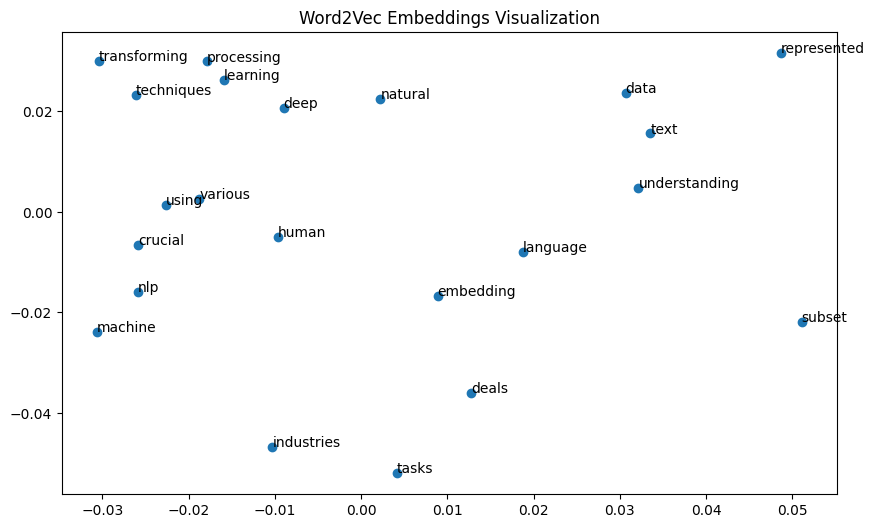

In [ ]:
from sklearn.decomposition import PCA

# Get the word vectors from Word2Vec model
word_vectors = model.wv[model.wv.index_to_key]

# Reduce dimensionality to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Plot the word embeddings in 2D space
plt.figure(figsize=(10,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

for i, word in enumerate(model.wv.index_to_key):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]))

plt.title('Word2Vec Embeddings Visualization')
plt.show()


# **5. GloVe:**
* Use pre-trained GloVe embeddings: Load GloVe vectors and map words in the dataset to their corresponding embeddings.
* Train a GloVe model (optional): Use the GloVe package to train embeddings if desired.


In [ ]:
!pip install gensim

In [ ]:
from glove import Glove
from glove import Corpus

# Create a corpus from the cleaned text
corpus = Corpus()
corpus.fit(tokenized_texts, window=10)

# Train the GloVe model
glove = Glove(no_components=50, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

# View the vector for a specific word
print(glove.word_vectors[glove.dictionary['embedding']])
!

ModuleNotFoundError: No module named 'glove'

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 89.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.2 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have nu

/usr/local/lib/python3.11/dist-packages/cupyx/scipy/sparse/_base.py:10: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  import scipy.sparse as _sparse
^C


In [ ]:
import spacy

# Load the pre-trained spaCy model (GloVe-like embeddings)
nlp = spacy.load("en_core_web_md")

# Get the word vector for a specific word
word = "embedding"
word_vector = nlp(word).vector

# Print the word vector
print(f"Vector for '{word}':\n{word_vector}")


/usr/local/lib/python3.11/dist-packages/cupyx/scipy/sparse/_base.py:10: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  import scipy.sparse as _sparse


OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
!pip install spacy

In [4]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 52.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Load the pre-trained spaCy model (GloVe-like embeddings)
nlp = spacy.load("en_core_web_md")

# Get the word vector for a specific word
word = "embedding"
word_vector = nlp(word).vector

# Print the word vector
print(f"Vector for '{word}':\n{word_vector}")


Vector for 'embedding':
[-7.9571e-01 -2.3235e-01  8.7786e-02  1.3830e-01 -7.9435e-01  4.9879e-01
  1.9986e-01  1.5826e-02 -3.2676e-01  8.0294e-01  1.1838e-01  4.4913e-01
 -2.0184e-01 -3.7835e-01  2.9467e-01 -7.4737e-01 -6.5797e-01  5.2855e-01
 -1.2551e-01 -3.6671e-01 -1.7163e-01  4.3829e-02 -6.3198e-01  5.1675e-01
  4.6543e-01  1.5144e-01  4.1323e-01 -2.9589e-01  1.7155e-01 -2.5250e-01
 -4.3110e-01  2.5887e-01  2.3236e-01 -3.8004e-01  9.6814e-01 -4.3459e-01
  9.0091e-02  5.6565e-01 -1.8114e-01 -9.8472e-02  1.0994e-01  7.0999e-02
 -2.2596e-01 -1.7553e-01 -1.8751e-01  1.6471e-01  5.0384e-02  6.3220e-02
 -2.5448e-01 -5.1470e-01 -1.5258e-01 -3.0592e-01 -4.0212e-01  8.1912e-02
 -5.4586e-02 -3.1323e-01  2.6340e-02  2.9837e-01  2.9434e-01 -2.7850e-01
 -6.0801e-03 -4.0965e-02 -8.4299e-01 -1.7199e-01  3.0573e-01 -1.5442e-01
 -3.3289e-01  1.7859e-01  2.3385e-01 -7.8020e-01  3.0564e-01  3.8324e-01
  3.5790e-02 -2.1441e-01 -2.6576e-01 -2.9713e-01  6.2804e-01 -1.5029e-01
 -2.3273e-01  1.3745e-01 -5

In [ ]:
import spacy

# Load the pre-trained spaCy model (GloVe-like embeddings)
nlp = spacy.load("en_core_web_md")

# Example: Process the cleaned text to get the word vectors
def get_word_vectors(text):
    doc = nlp(text)
    # Return the average word vector of all tokens in the document
    return doc.vector

# Apply the function to the cleaned_text column
df['word_vector'] = df['cleaned_text'].apply(get_word_vectors)

# Display the processed DataFrame with word vectors
print(df[['cleaned_text', 'word_vector']])


                                        cleaned_text  \
0                   text embedding crucial nlp tasks   
1           machine learning transforming industries   
2              deep learning subset machine learning   
3  natural language processing deals understandin...   
4  text data represented using various embedding ...   

                                         word_vector  
0  [-0.732738, 0.20866199, -0.20861883, 0.0553138...  
1  [-0.7503575, 0.12703075, -0.020711988, -0.1824...  
2  [-0.767366, 0.21592982, -0.15092558, -0.065373...  
3  [-0.6814814, -0.22555415, -0.25004816, -0.0562...  
4  [-0.77561283, 0.13406001, -0.15341485, -0.1082...  


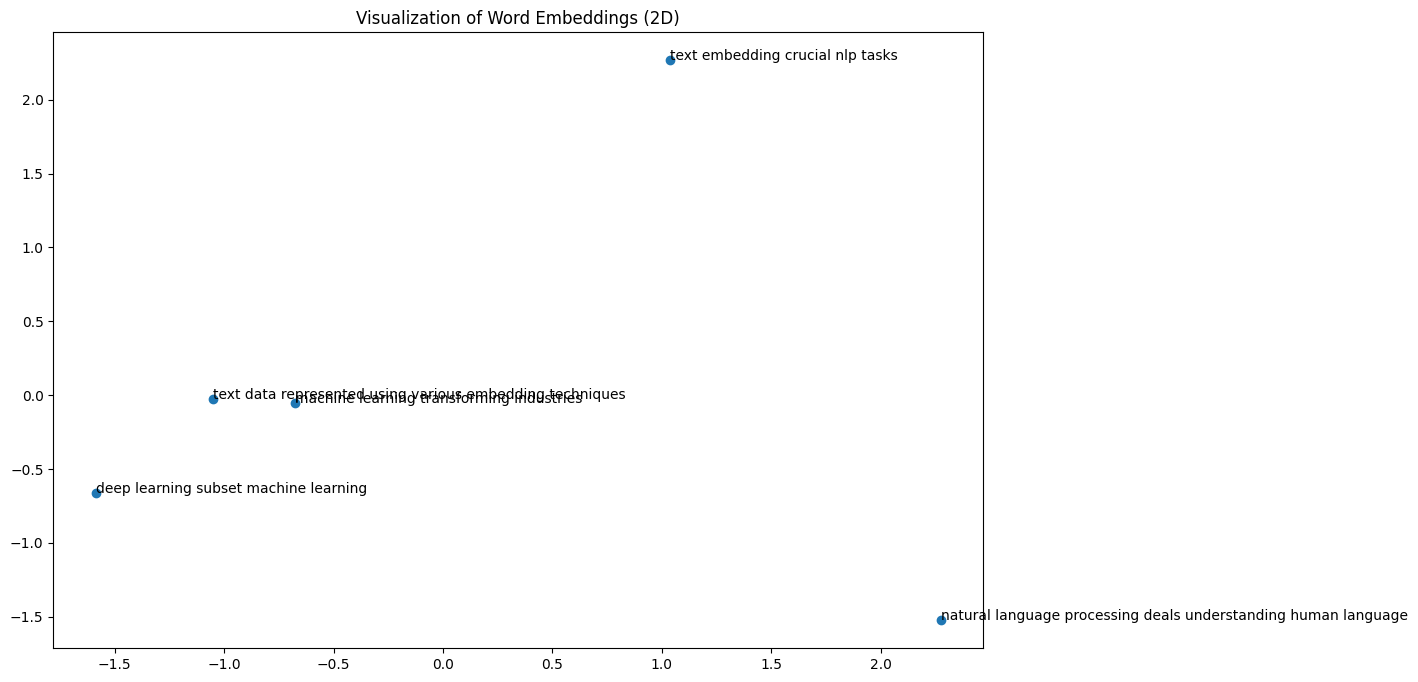

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get word vectors from the DataFrame (we'll use the first 100 samples for simplicity)
word_vectors = df['word_vector'].tolist()

# Reduce the dimensionality of word vectors to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Plot the word embeddings in 2D space
plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

# Annotate each point with its corresponding cleaned text
for i, text in enumerate(df['cleaned_text']):
    plt.annotate(text, (pca_result[i, 0], pca_result[i, 1]))

plt.title('Visualization of Word Embeddings (2D)')
plt.show()


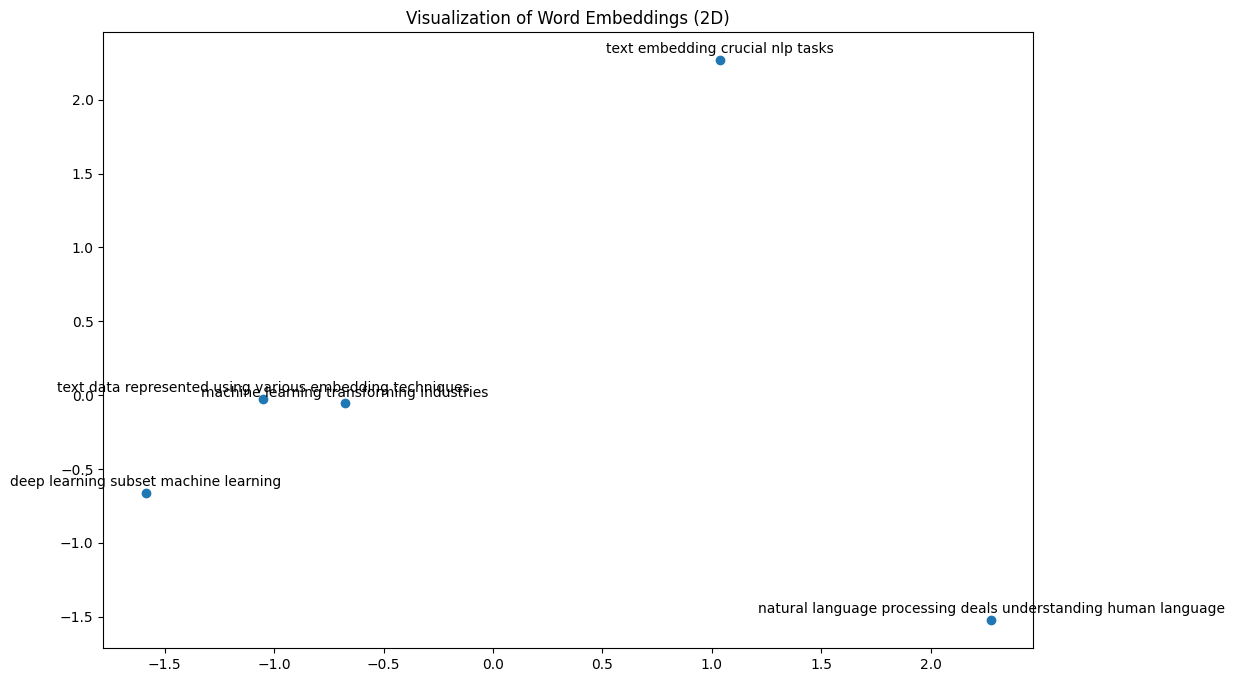

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get word vectors from the DataFrame (we'll use the first 50 samples for simplicity)
word_vectors = df['word_vector'].tolist()
texts = df['cleaned_text'].tolist()

# Reduce the dimensionality of word vectors to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Plot the word embeddings in 2D space
plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

# Adjust the positions of annotations to avoid overlap
for i, text in enumerate(texts):
    plt.annotate(text, (pca_result[i, 0], pca_result[i, 1]),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

plt.title('Visualization of Word Embeddings (2D)')
plt.show()


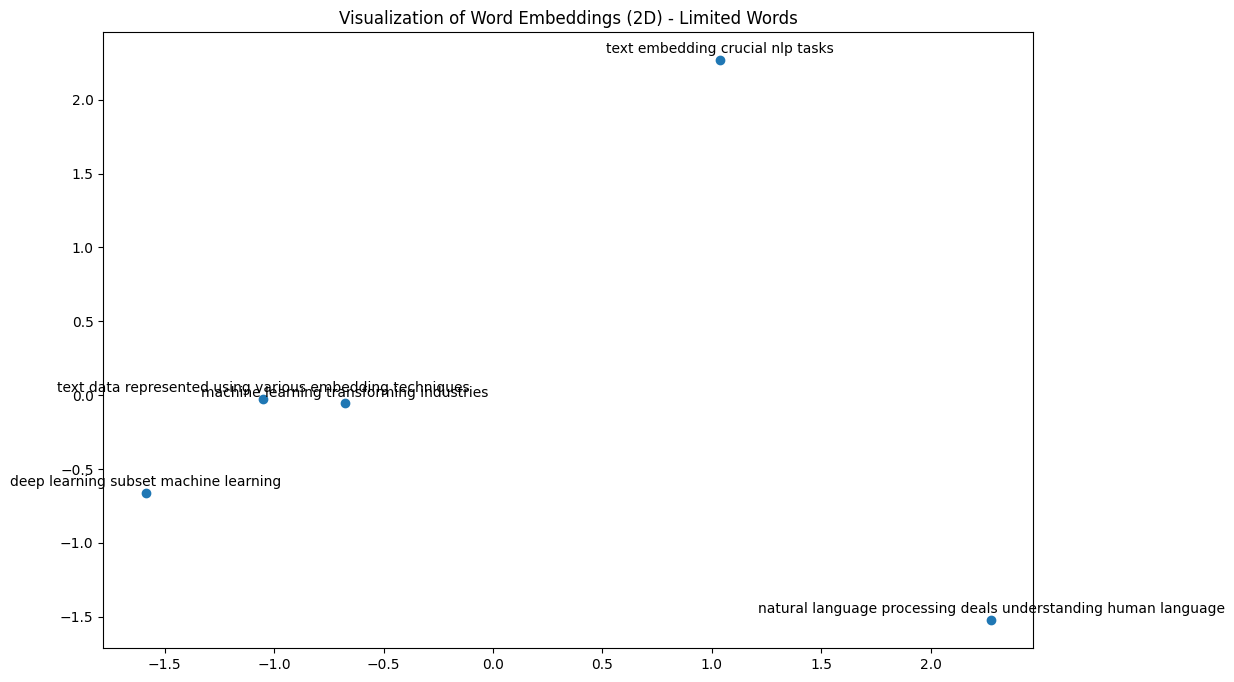

In [ ]:
# Limit the number of words to plot (e.g., first 20)
limit = 20
word_vectors_limited = word_vectors[:limit]
texts_limited = texts[:limit]

# Reduce dimensionality to 2D using PCA for limited data
pca_result_limited = pca.fit_transform(word_vectors_limited)

# Plot the word embeddings in 2D space
plt.figure(figsize=(12, 8))
plt.scatter(pca_result_limited[:, 0], pca_result_limited[:, 1])

# Annotate the limited set of words
for i, text in enumerate(texts_limited):
    plt.annotate(text, (pca_result_limited[i, 0], pca_result_limited[i, 1]),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

plt.title('Visualization of Word Embeddings (2D) - Limited Words')
plt.show()


In [ ]:
!python -m spacy download en_vectors_web_lg

/usr/local/lib/python3.11/dist-packages/cupyx/scipy/sparse/_base.py:10: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  import scipy.sparse as _sparse

✘ No compatible package found for 'en_vectors_web_lg' (spaCy
v3.8.7)



# **6. FastText:**
* Train a FastText model: Use Gensim’s FastText to train embeddings that consider subword information.
* Analyze FastText embeddings: Compare them with Word2Vec and GloVe embeddings.


In [2]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 25.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requi

In [7]:
from gensim.models import FastText
from gensim.utils import simple_preprocess

# Sample corpus
corpus = [
    "FastText considers subword information.",
    "Word2Vec treats every word as an atomic entity.",
    "GloVe leverages global word co-occurrence statistics."
]
# Preprocess corpus
corpus = [simple_preprocess(doc) for doc in corpus]

# Train FastText model
ft_model = FastText(
    sentences=corpus,
    vector_size=10,  # Smaller size for readability
    window=5,
    min_count=1,
    epochs=10
)

# Get FastText embedding for 'fasttext'
fasttext_vector = ft_model.wv['fasttext']
print("FastText embedding for 'fasttext':")
print(fasttext_vector)

# Get FastText embedding for 'information'
fasttext_vector = ft_model.wv['information']
print("FastText embedding for 'information':")
print(fasttext_vector)




FastText embedding for 'fasttext':
[ 0.00906787 -0.00530815 -0.00275941  0.00349125 -0.00242799 -0.01152946
  0.02509905 -0.00598241  0.0041849   0.00632296]
FastText embedding for 'information':
[ 0.00314254  0.01613919 -0.01670325 -0.00549401  0.00178539 -0.00770535
  0.00898322  0.00137686  0.00356065  0.00688627]


In [8]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# Same pre-processed corpus as above
corpus = [
    "FastText considers subword information.",
    "Word2Vec treats every word as an atomic entity.",
    "GloVe leverages global word co-occurrence statistics."
]
corpus = [simple_preprocess(doc) for doc in corpus]

# Train Word2Vec model
w2v_model = Word2Vec(
    sentences=corpus,
    vector_size=10,  # Same size for fair comparison
    window=5,
    min_count=1,
    epochs=10
)

# Get Word2Vec embedding for 'fasttext'
word2vec_vector = w2v_model.wv['fasttext']
print("Word2Vec embedding for 'fasttext':")
print(word2vec_vector)

# Get Word2Vec embedding for 'information'
word2vec_vector = w2v_model.wv['information']
print("Word2Vec embedding for 'information':")
print(word2vec_vector)


Word2Vec embedding for 'fasttext':
[-0.037098   -0.08745642  0.05437467  0.06509756 -0.0078755  -0.06709856
 -0.07085925 -0.0249706   0.05143254 -0.03665238]
Word2Vec embedding for 'information':
[-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]


In [6]:
import spacy

# Load spaCy's English model with vectors (medium size recommended for demo)
nlp = spacy.load("en_core_web_md")  # Make sure to install: python -m spacy download en_core_web_md

# Get the embedding for 'fasttext'
doc = nlp("fasttext")
vector = doc[0].vector
print("spaCy (GloVe-style) embedding for 'fasttext':")
print(vector)


# Get the embedding for 'information'
doc = nlp("information")
vector = doc[0].vector
print("spaCy (GloVe-style) embedding for 'fasttext':")
print(vector)


spaCy (GloVe-style) embedding for 'fasttext':
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
spaCy (GloVe-style) embedding for 'fastt

In [ ]:
import spacy

# Load the pre-trained FastText model (en_core_web_md has FastText embeddings)
nlp = spacy.load("en_core_web_md")

# Example function to get word vector using FastText embeddings
def get_word_vectors(text):
    doc = nlp(text)
    # Return the average word vector of all tokens in the document
    return doc.vector

# Apply the function to your cleaned_text column
df['word_vector_fasttext'] = df['cleaned_text'].apply(get_word_vectors)

# Display the DataFrame with word vectors from FastText
print(df[['cleaned_text', 'word_vector_fasttext']])


                                        cleaned_text  \
0                   text embedding crucial nlp tasks   
1           machine learning transforming industries   
2              deep learning subset machine learning   
3  natural language processing deals understandin...   
4  text data represented using various embedding ...   

                                word_vector_fasttext  
0  [-0.732738, 0.20866199, -0.20861883, 0.0553138...  
1  [-0.7503575, 0.12703075, -0.020711988, -0.1824...  
2  [-0.767366, 0.21592982, -0.15092558, -0.065373...  
3  [-0.6814814, -0.22555415, -0.25004816, -0.0562...  
4  [-0.77561283, 0.13406001, -0.15341485, -0.1082...  


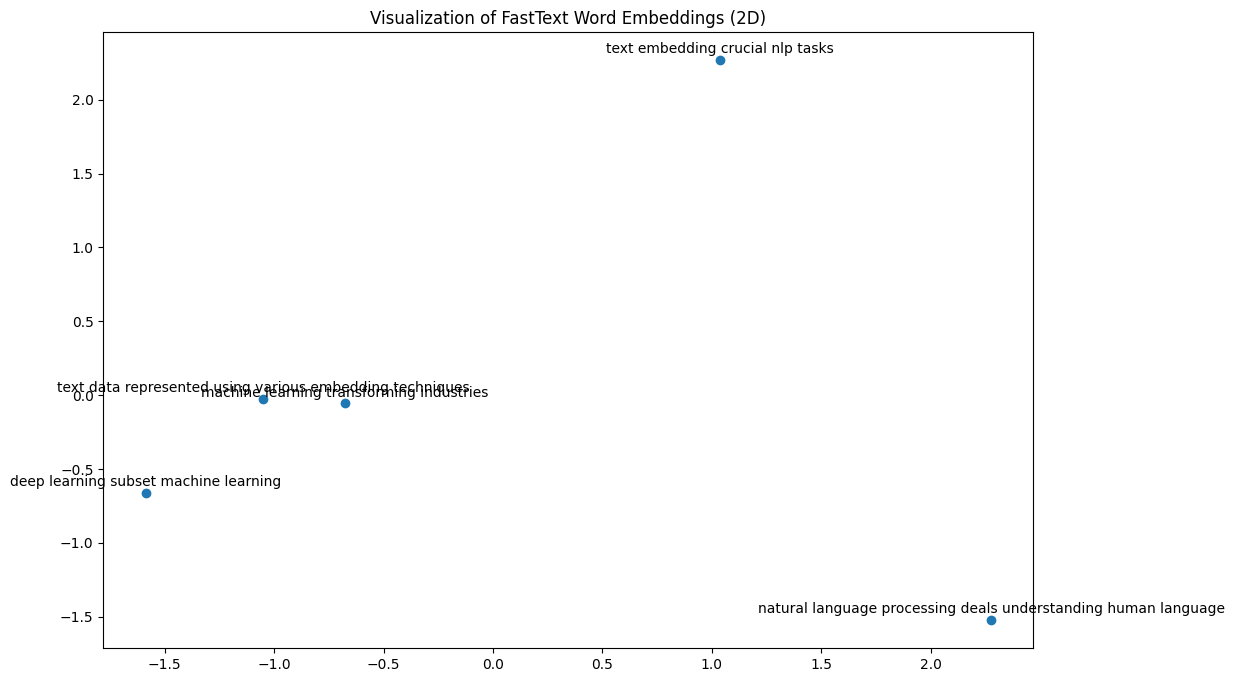

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get FastText word vectors from the DataFrame
word_vectors_fasttext = df['word_vector_fasttext'].tolist()
texts = df['cleaned_text'].tolist()

# Reduce the dimensionality to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_result_fasttext = pca.fit_transform(word_vectors_fasttext)

# Plot the word embeddings in 2D space
plt.figure(figsize=(12, 8))
plt.scatter(pca_result_fasttext[:, 0], pca_result_fasttext[:, 1])

# Annotate each point with its corresponding cleaned text
for i, text in enumerate(texts):
    plt.annotate(text, (pca_result_fasttext[i, 0], pca_result_fasttext[i, 1]),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

plt.title('Visualization of FastText Word Embeddings (2D)')
plt.show()
